In [35]:
% pip install pandas-datareader
% pip install yfinance


In [36]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [37]:
start = '2010-01-01'
end = '2024-10-18'

df = yf.download('TSLA', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [38]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [39]:
#Resetting the index 
df = df.reset_index()  

In [40]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [41]:
# droping date and Adj Close Column 
df = df.drop(['Date', 'Adj Close'], axis=1)

In [42]:
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


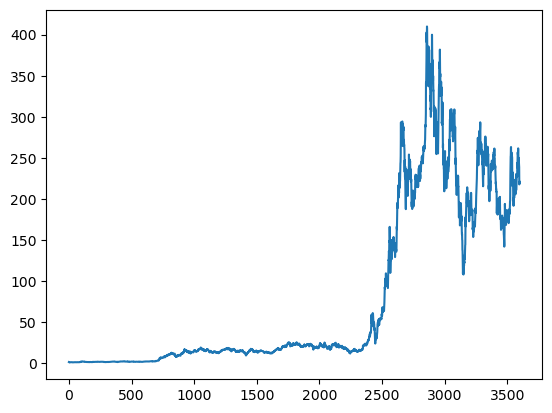

In [43]:
plt.plot(df.Close)

In [44]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3596    216.675200
3597    217.000800
3598    217.395400
3599    217.871300
3600    218.277606
Name: Close, Length: 3601, dtype: float64

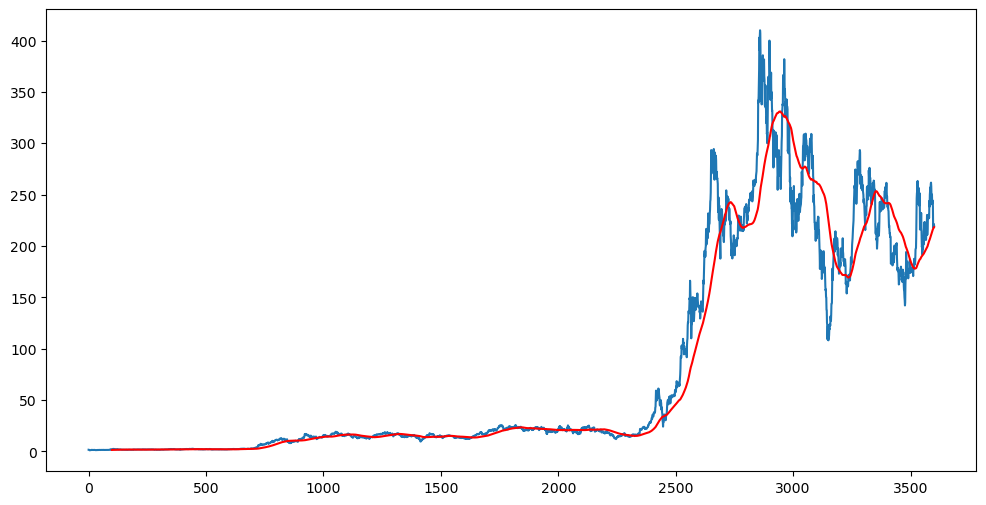

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [46]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3596    202.336350
3597    202.124950
3598    201.956900
3599    201.821150
3600    201.678403
Name: Close, Length: 3601, dtype: float64

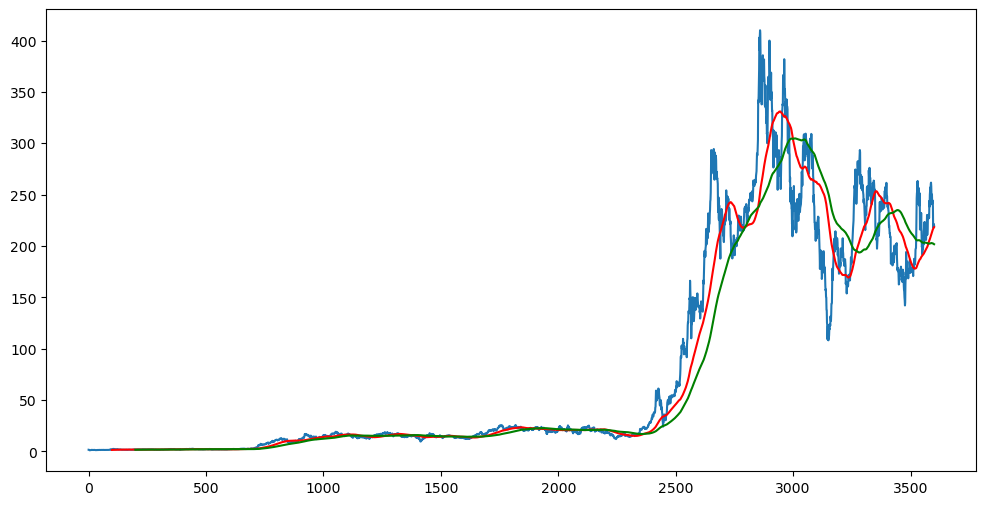

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [48]:
df.shape

(3601, 5)

In [51]:
#spliting the data into Training and Testing


data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_traning.shape)
print(data_testing.shape)

(2520, 1)
(1081, 1)


In [52]:
data_traning.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [53]:
data_testing.head()

,Close
2520,80.577332
2521,91.438667
2522,92.657333
2523,91.058670
2524,92.952003


In [56]:
% pip install scikit-learn

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [60]:
#transform the Traning Data into Array
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array

array([[0.00732904],
       [0.00727468],
       [0.00558057],
       ...,
       [0.90009335],
       [0.96392565],
       [1.        ]])

In [62]:
x_train = []
y_train = []

for i in range(100,data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100:i])
    y_train.append(data_traning_array[i,0])

In [64]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [66]:
% pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------ 41.0/48.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 409.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 4.1 MB/s eta 0:01:35
   ---------------------------------------- 0.2/385.2 MB 2.1 MB/s eta 0:03:05
   ---------------------------------------- 0.3/385.2 MB 2.2 MB/s eta 0:02:56
   ---------------------------------------- 0.4/385.2 MB 2.4 MB/s eta 0:02:42
   ---------------------------------------- 0.6/385.2 MB 2.5 MB/s eta 0:02:35
   ---------------------------------------- 0.7/385.2 MB 2.6 MB/s eta 0:02:31
   ---------------------------------------- 0.8/385.2 MB 2.3 MB/s eta 0:02:45
   ---------------------------------------- 0.9/385.2 MB 2.5 MB/s eta 0

In [67]:
#Ml Model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [68]:
model = Sequential()
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))



model.add(Dense(units=1))

c:\Users\welcome\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
print(x_train)
print(x_train.shape)


[[[7.32903549e-03]
  [7.27468000e-03]
  [5.58057333e-03]
  ...
  [1.35890493e-02]
  [1.25653455e-02]
  [1.24022757e-02]]

 [[7.27468000e-03]
  [5.58057333e-03]
  [3.08018805e-03]
  ...
  [1.25653455e-02]
  [1.24022757e-02]
  [1.27646549e-02]]

 [[5.58057333e-03]
  [3.08018805e-03]
  [2.80844296e-04]
  ...
  [1.24022757e-02]
  [1.27646549e-02]
  [1.37611810e-02]]

 ...

 [[6.51277834e-01]
  [6.64196513e-01]
  [6.63390223e-01]
  ...
  [8.56155364e-01]
  [8.78921625e-01]
  [8.55149808e-01]]

 [[6.64196513e-01]
  [6.63390223e-01]
  [6.84417004e-01]
  ...
  [8.78921625e-01]
  [8.55149808e-01]
  [9.00093345e-01]]

 [[6.63390223e-01]
  [6.84417004e-01]
  [6.87225385e-01]
  ...
  [8.55149808e-01]
  [9.00093345e-01]
  [9.63925652e-01]]]
(2420, 100, 1)


In [72]:
model.compile(optimizer="adam", loss="mean_squared_error")

# Fit the model with both x_train and y_train
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - loss: 0.0216
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - loss: 0.0032
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0039
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0035
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0025
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0022
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0022
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - loss: 0.0018
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0025
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0017
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0015
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0017
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.0015
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0015
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [73]:
model.save("Tensorflow_keras_model.h5")

In [75]:
past_100_days = data_traning.tail(100)

In [77]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [78]:
final_df.head(5)

,Close
0,51.418667
1,51.625332
2,51.152668
3,53.599998
4,53.335335


In [79]:
input_data = scaler.fit_transform(final_df)

In [81]:
input_data

array([[0.07084254],
       [0.0713781 ],
       [0.07015323],
       ...,
       [0.50659346],
       [0.51115434],
       [0.50737243]])

In [83]:
input_data.shape

(1181, 1)

In [86]:
x_test = []
y_test = []


for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i]) 
    y_test.append(input_data[i, 0])    

In [87]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [88]:
print(x_test.shape)
print(y_test.shape)

(1081, 100, 1)
(1081,)


In [89]:
#making predections

y_predicted = model.predict(x_test)
y_predicted.shape

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step


(1081, 1)

In [92]:
#scale up 

scaler.scale_

array([0.00259142])

In [94]:
scale_factor = 1/0.00259142

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

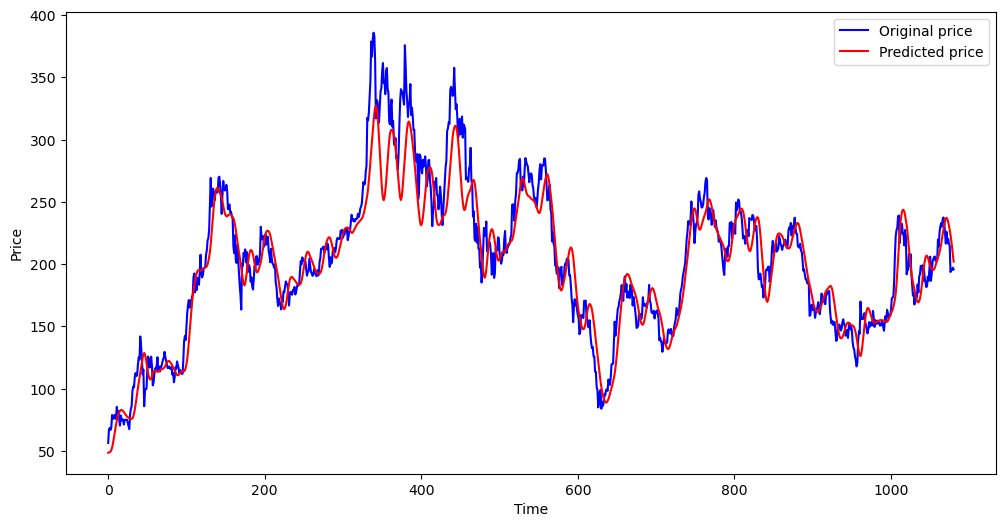

In [95]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"b", label = "Original price")
plt.plot(y_predicted,"r", label = "Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()